============================================
# CREDIT CARD FRAUD DETECTION
# Notebook 1: Exploratory Data Analysis (EDA)
# ============================================
# Author: [Your Name]
# Date: December 2024
# ============================================

# %% [markdown]
# # 1. Introduction
# 
# This notebook performs exploratory data analysis on the Credit Card Fraud Detection dataset.
# 
# **Objectives:**
# - Understand dataset structure and characteristics
# - Identify data quality issues (missing values, outliers)
# - Analyze class imbalance
# - Visualize feature distributions
# - Extract key insights for modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Plotting settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
#Setting the number of columns visible when printing the df
#
#
pd.set_option("display.max_columns", 31)
pd.set_option("display.precision",2)

In [4]:
#Storing the data as dataframe with pandas

df = pd.read_csv("../data/raw/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,2.51e-01,-1.83e-02,2.78e-01,-0.11,6.69e-02,0.13,-0.19,1.34e-01,-0.02,149.62,0
1,0.0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-6.91e-02,-2.26e-01,-6.39e-01,0.10,-3.40e-01,0.17,0.13,-8.98e-03,0.01,2.69,0
2,1.0,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,5.25e-01,2.48e-01,7.72e-01,0.91,-6.89e-01,-0.33,-0.14,-5.54e-02,-0.06,378.66,0
3,1.0,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-2.08e-01,-1.08e-01,5.27e-03,-0.19,-1.18e+00,0.65,-0.22,6.27e-02,0.06,123.50,0
4,2.0,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,4.09e-01,-9.43e-03,7.98e-01,-0.14,1.41e-01,-0.21,0.50,2.19e-01,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,4.36,-1.59,2.71,-0.69,4.63,-0.92,1.11,1.99,0.51,-0.68,1.48e+00,2.13e-01,1.12e-01,1.01,-5.09e-01,1.44,0.25,9.44e-01,0.82,0.77,0
284803,172787.0,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,-0.98,-0.15,0.92,1.21,-0.68,1.16,-0.71,-0.03,-1.22,-1.55,5.96e-02,2.14e-01,9.24e-01,0.01,-1.02e+00,-0.61,-0.40,6.85e-02,-0.05,24.79,0
284804,172788.0,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,-0.48,0.41,0.06,-0.18,-0.51,1.33,0.14,0.31,0.40,-0.58,1.40e-03,2.32e-01,5.78e-01,-0.04,6.40e-01,0.27,-0.09,4.45e-03,-0.03,67.88,0
284805,172788.0,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,-0.40,-1.93,-0.96,-1.04,0.45,1.96,-0.61,0.51,1.11,2.90,1.27e-01,2.65e-01,8.00e-01,-0.16,1.23e-01,-0.57,0.55,1.09e-01,0.10,10.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-1.83e-02,2.78e-01,-0.11,0.07,0.13,-0.19,1.34e-01,-0.02,149.62,0
1,0.0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-2.26e-01,-6.39e-01,0.10,-0.34,0.17,0.13,-8.98e-03,0.01,2.69,0
2,1.0,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,2.48e-01,7.72e-01,0.91,-0.69,-0.33,-0.14,-5.54e-02,-0.06,378.66,0
3,1.0,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-1.08e-01,5.27e-03,-0.19,-1.18,0.65,-0.22,6.27e-02,0.06,123.50,0
4,2.0,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-9.43e-03,7.98e-01,-0.14,0.14,-0.21,0.50,2.19e-01,0.22,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,1.18e-15,3.38e-16,-1.38e-15,2.09e-15,1.02e-15,1.49e-15,-5.62e-16,1.15e-16,-2.41e-15,2.24e-15,1.72e-15,-1.25e-15,8.24e-16,1.21e-15,4.87e-15,1.44e-15,-3.77e-16,9.71e-16,1.04e-15,6.42e-16,1.63e-16,-3.58e-16,2.62e-16,4.47e-15,5.11e-16,1.69e-15,-3.66e-16,-1.23e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,1.09e+00,1.02e+00,9.99e-01,9.95e-01,9.59e-01,9.15e-01,8.76e-01,8.49e-01,8.38e-01,8.14e-01,7.71e-01,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,-2.46e+01,-4.80e+00,-1.87e+01,-5.79e+00,-1.92e+01,-4.50e+00,-1.41e+01,-2.52e+01,-9.50e+00,-7.21e+00,-5.45e+01,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,-5.35e-01,-7.62e-01,-4.06e-01,-6.49e-01,-4.26e-01,-5.83e-01,-4.68e-01,-4.84e-01,-4.99e-01,-4.56e-01,-2.12e-01,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,-9.29e-02,-3.28e-02,1.40e-01,-1.36e-02,5.06e-02,4.81e-02,6.64e-02,-6.57e-02,-3.64e-03,3.73e-03,-6.25e-02,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,4.54e-01,7.40e-01,6.18e-01,6.63e-01,4.93e-01,6.49e-01,5.23e-01,4.00e-01,5.01e-01,4.59e-01,1.33e-01,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,2.37e+01,1.20e+01,7.85e+00,7.13e+00,1.05e+01,8.88e+00,1.73e+01,9.25e+00,5.04e+00,5.59e+00,3.94e+01,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


In [9]:
missing = df.isnull().sum()

print(missing[missing>0] if missing.sum()>0 else "No missing values found")

No missing values found


In [10]:
duplicated = df.duplicated().sum()
print(f"Number of duplicates found: {duplicated.sum()}" if duplicated.sum() >0 else "No duplicates found")

Number of duplicates found: 1081


In [11]:
count_class = df["Class"].value_counts()
percentage = df["Class"].value_counts(normalize = True)*100
print(f" Legimtimate(0): {count_class[0]} ({percentage[0]:.3f})%")
print(f" Fraud (1) : {count_class[1]} ({percentage[1]:.3f}%)")

 Legimtimate(0): 284315 (99.827)%
 Fraud (1) : 492 (0.173%)


In [12]:
print(f"Imbalance ratio: 1:{count_class[0]/count_class[1]:.0f}")

Imbalance ratio: 1:578


In [13]:
print("Amount Analysis")
print(df["Amount"].describe())

Amount Analysis
count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64


<Axes: xlabel='Class', ylabel='Amount'>

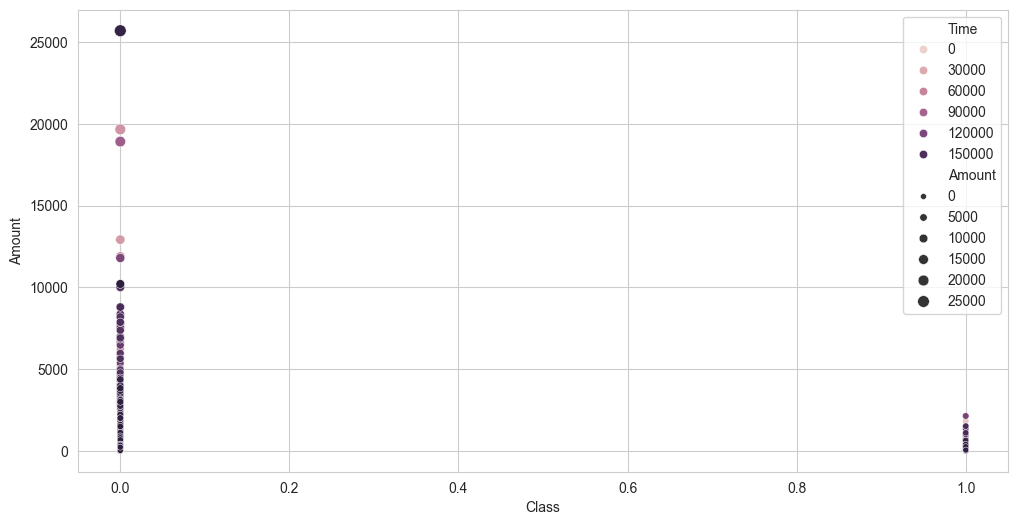

In [14]:
sns.scatterplot(x = "Class", y = "Amount", data = df, hue= "Time", size = "Amount")

<Axes: xlabel='Amount', ylabel='Count'>

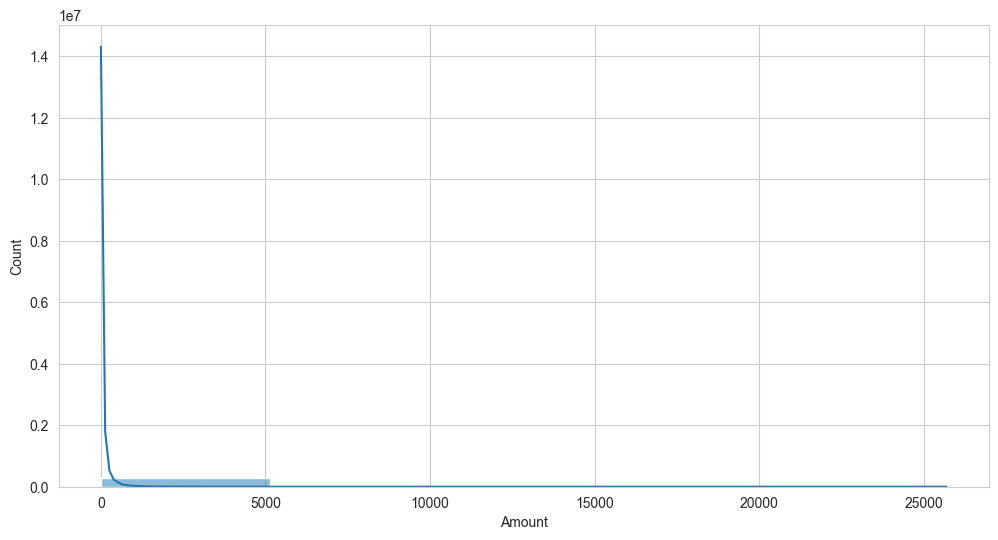

In [15]:
sns.histplot(df["Amount"], kde = True, bins = 5)

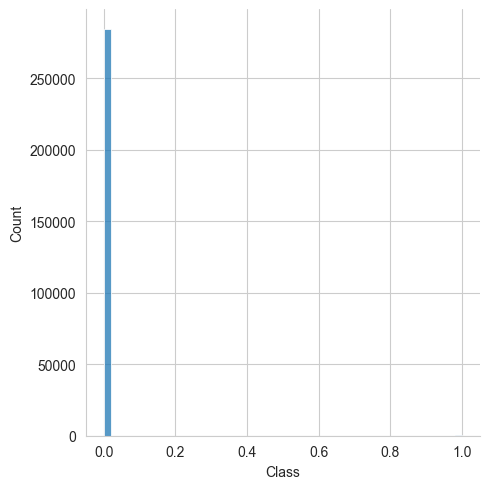

In [16]:
sns.displot(df["Class"], kde = False, bins = 50)

In [17]:
count_class

Class
0    284315
1       492
Name: count, dtype: int64

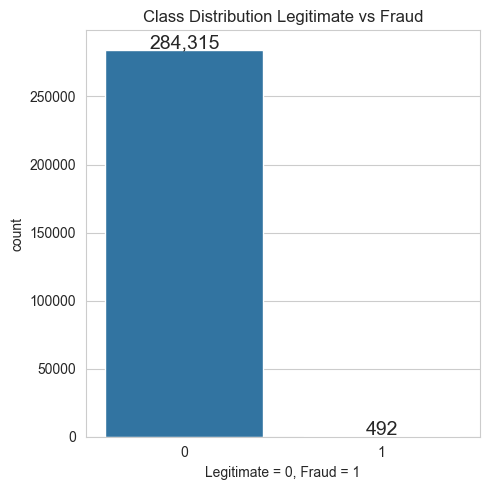

In [33]:
plt.figure(figsize = (5,5))
plt.title("Class Distribution Legitimate vs Fraud")
sns.countplot(data = df, x = "Class")
plt.xlabel("Legitimate = 0, Fraud = 1")

for i, count in enumerate(count_class):
    plt.text( x = i, y = count +1000, s = f"{count:,}", ha= "center", fontsize=14)
plt.tight_layout()
plt.savefig("../reports/figures/class_distribution.png", dpi = 300)
plt.show()

**Osservazione chiave:** 
Il dataset è estremamente sbilanciato con solo lo 0.173% di transazioni fraudolente 
(492 fraud su 284,807 totali). Rapporto: 1:578.

**Implicazione per il progetto:**
Questo forte sbilanciamento richiederà tecniche specifiche:
- SMOTE (Synthetic Minority Over-sampling)
- Random Undersampling
- Class weights nei modelli
- Metriche appropriate (non solo accuracy, ma precision/recall/F1)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64


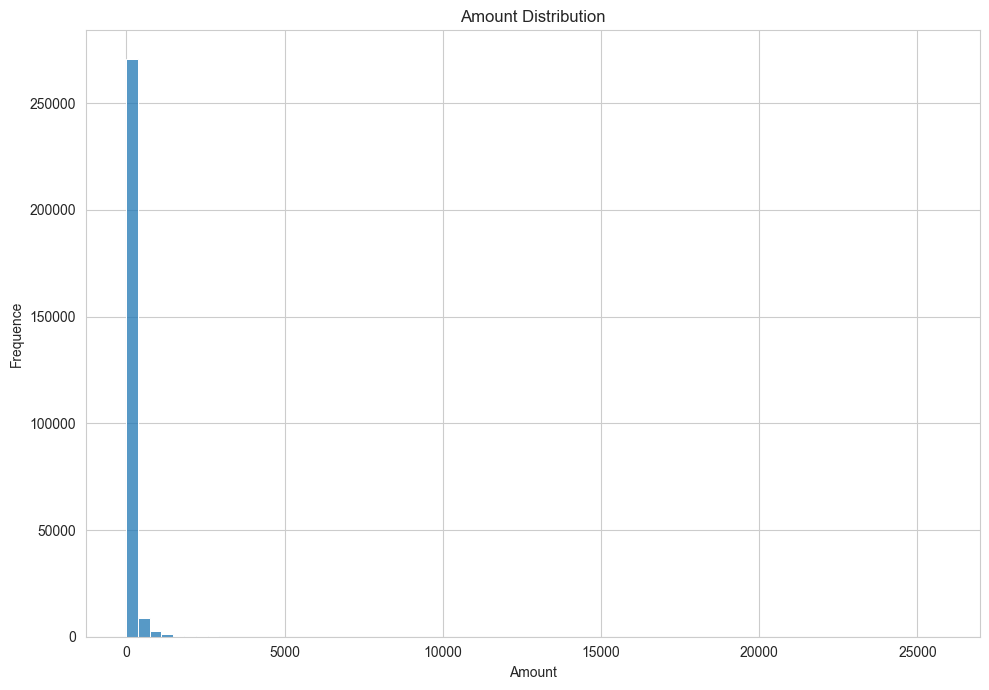

In [65]:
print(df["Amount"].describe())
plt.figure(figsize = (10,7))
plt.title("Amount Distribution")
sns.histplot(data = df, x = "Amount", bins = 70)
plt.ylabel("Frequence")
plt.tight_layout()

plt.savefig("../reports/figures/amount_distribution.png", dpi = 300)
plt.show()

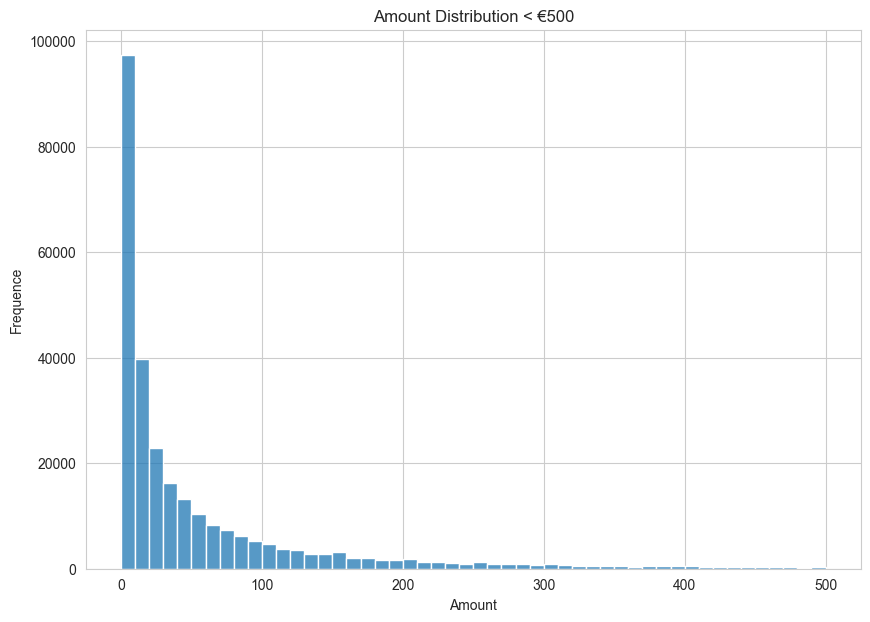

In [66]:
plt.figure(figsize = (10,7))
plt.title("Amount Distribution < €500")
sns.histplot( data =df[df["Amount"]<500], x = "Amount", bins = 50)
plt.ylabel("Frequence")

plt.savefig("../reports/figures/amount_zoomed_dist.png", dpi = 300)
plt.show()

**Osservazione chiave:**
La distribuzione di Amount è fortemente asimmetrica (right-skewed):
- Mediana: €22 (50% transazioni sotto questo valore)
- Media: ~€88 (influenzata da outliers)
- Max: €25,691 (outlier estremo)

**Pattern identificato:**
La maggior parte delle transazioni ha importi bassi (€0-€100), con una 
"coda lunga" di valori alti. Presenza di outliers significativi.

**Prossimo step:**
Verificare se le frodi hanno importi diversi dalle transazioni legittime.

In [74]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.29,250.11,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.21,256.68,0.0,1.00,9.25,105.89,2125.87


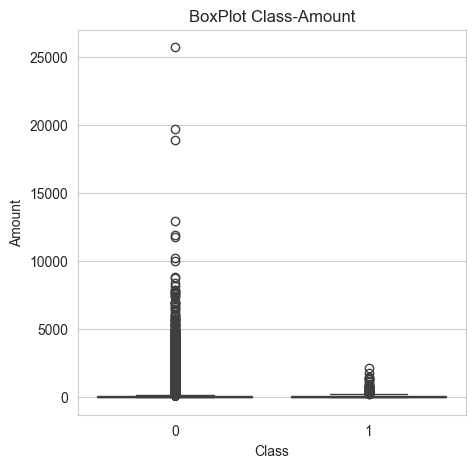

<Figure size 1200x600 with 0 Axes>

In [81]:
plt.figure(figsize = (5,5))

plt.title("BoxPlot Class-Amount")
sns.boxplot(data = df, x = "Class", y = "Amount")
plt.show()
plt.savefig("../reports/figures/boxplot_ClAm.png")

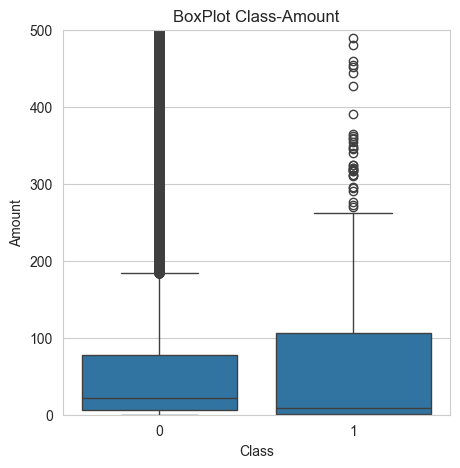

<Figure size 1200x600 with 0 Axes>

In [82]:
plt.figure(figsize = (5,5))

plt.title("BoxPlot Class-Amount")
sns.boxplot(data = df, x = "Class", y = "Amount")
plt.ylim(0,500)
plt.show()
plt.savefig("../reports/figures/boxplot_ClAmZoomed.png")

**Osservazione chiave:**
Le frodi mostrano una mediana più bassa (€9.25 vs €22), ma con 
forte sovrapposizione nelle distribuzioni.

**Statistiche Amount per classe:**
- Legitimate: mediana €22, Q1-Q3: €5.65-€77
- Fraud: mediana €9.25, Q1-Q3: €1-€105.89

**Interpretazione:**
Amount da sola non è un predittore forte (troppa sovrapposizione), 
ma il pattern "frodi tendono ad avere importi più bassi" è rilevante 
e sarà utile al modello in combinazione con altre features.

**Outliers:** Entrambe le classi presentano outliers significativi. 
Non li rimuoveremo perché potrebbero essere frodi legittime.